In [1]:
import csv, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
table = pd.read_csv('california_housing_train.csv')
# table.head()
table.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


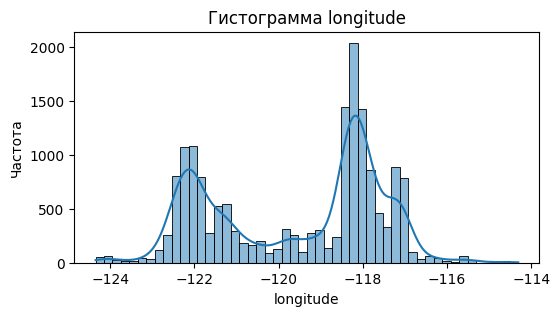

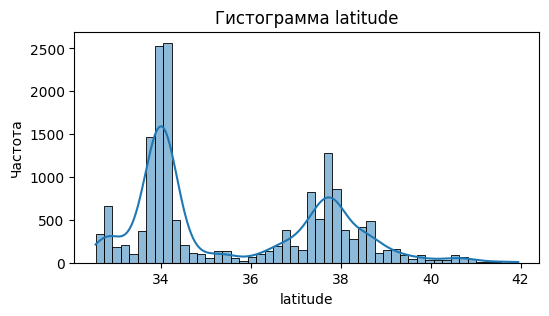

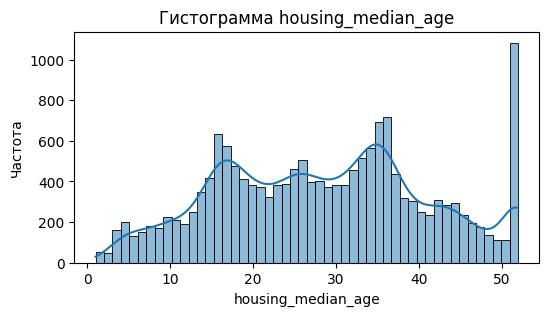

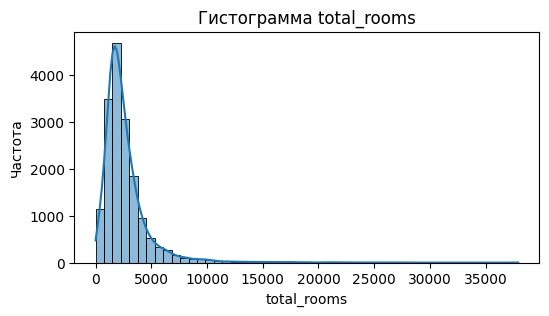

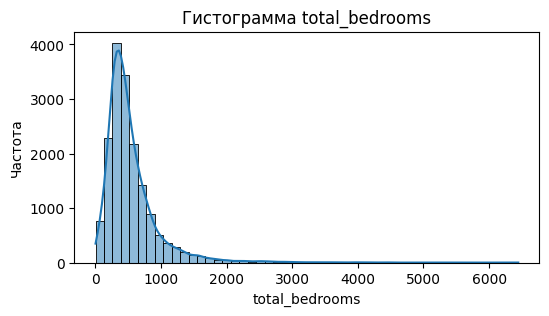

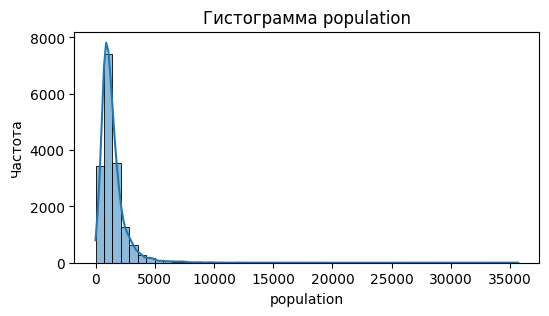

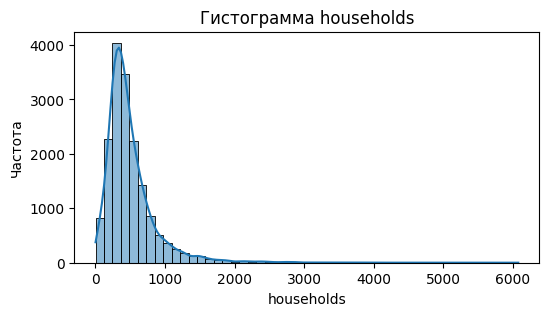

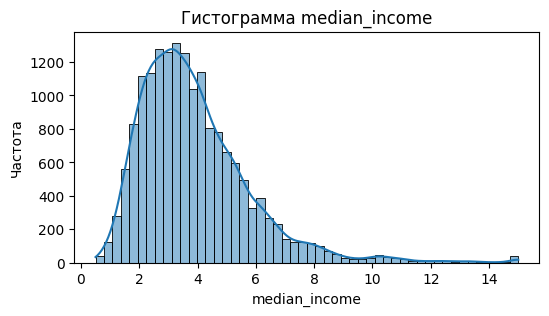

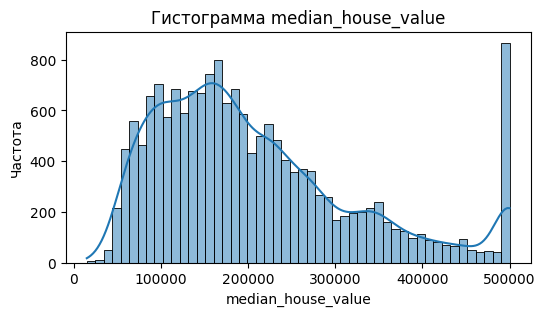

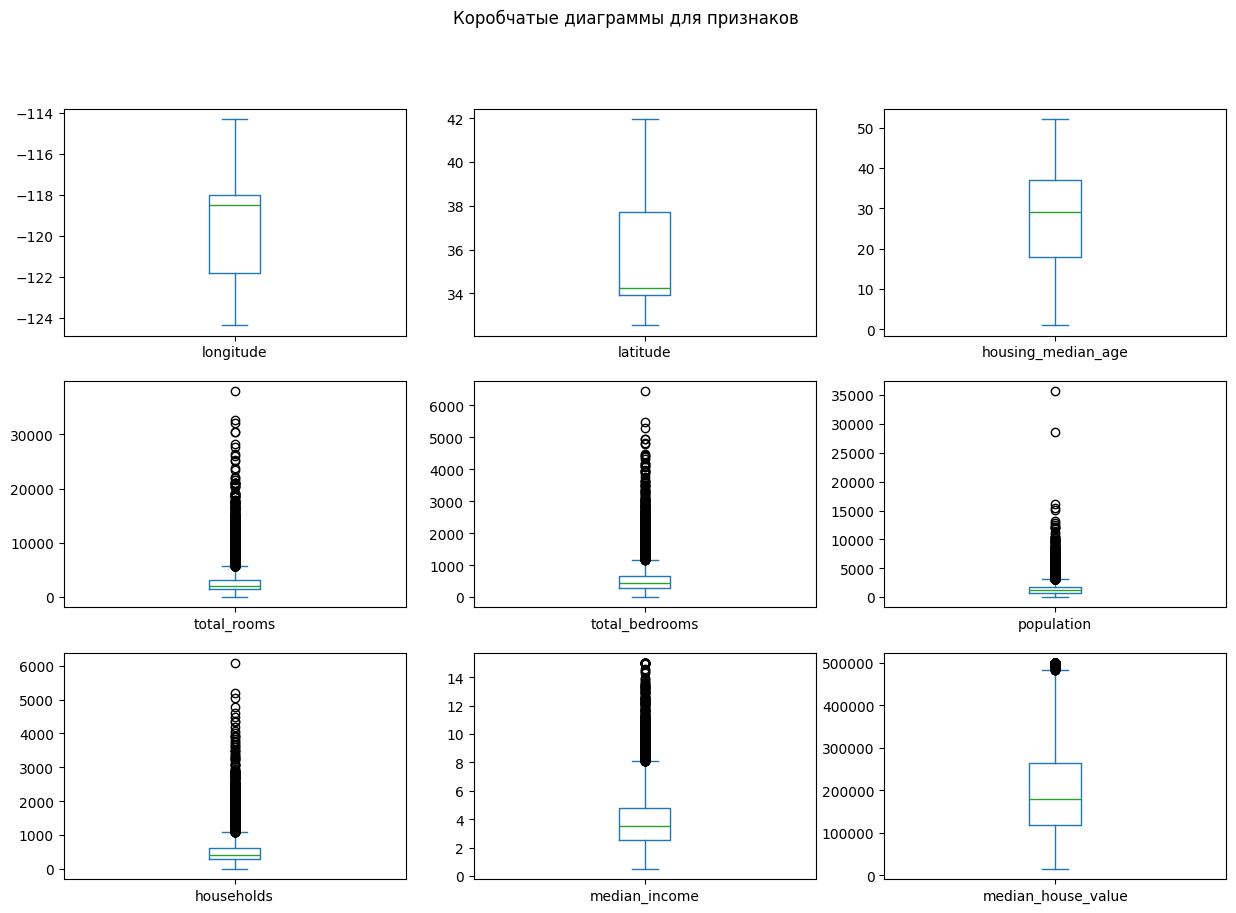

In [3]:
# table.hist(bins=50, figsize=(15, 10))
# plt.suptitle("Гистограммы признаков набора данных")
# plt.show()


# Построение гистограмм для всех числовых признаков
for column in table.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(table[column], bins=50, kde=True)
    plt.title(f"Гистограмма {column}")
    plt.xlabel(column)
    plt.ylabel("Частота")
    plt.show()


table.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle("Коробчатые диаграммы для признаков")
plt.show()




In [4]:
# Поиск отсутствующих значений
missing_values = table.isnull().sum()
print(missing_values[missing_values > 0])  # Показать только столбцы с пропусками


Series([], dtype: int64)


In [5]:
# Поиск и обработка отсутствующих значений
for column in table.columns:
    # Проверка на наличие пропущенных значений
    if table[column].isnull().sum() > 0:
        # Заполнение пропущенных значений медианой
        table[column].fillna(table[column].median(), inplace=True)

In [6]:
# Установка случайного начального состояния для воспроизводимости
np.random.seed(42)

# Перемешивание и разделение данных
# 80% на обучение, 20% на тестирование
train_data = table.sample(frac=0.8, random_state=42).reset_index(drop=True)
test_data = table.drop(train_data.index).reset_index(drop=True)

# Нормализация данных без использования sklearn
def standardize_column(column, mean, std):
    return (column - mean) / std

# Определяем числовые столбцы
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Рассчитываем среднее и стандартное отклонение для обучающего набора
train_means = train_data[numerical_columns].mean()
train_stds = train_data[numerical_columns].std()

# Применяем нормализацию к обучающему и тестовому наборам
for column in numerical_columns:
    train_data[column] = standardize_column(train_data[column], train_means[column], train_stds[column])
    test_data[column] = standardize_column(test_data[column], train_means[column], train_stds[column])

# Проверка изменений
print("Train Data:")
print(train_data.describe())
print("\nTest Data:")
print(test_data.describe())


Train Data:
          longitude      latitude  housing_median_age   total_rooms  \
count  1.360000e+04  1.360000e+04        1.360000e+04  1.360000e+04   
mean   4.981114e-15 -6.755381e-16        1.175530e-16  5.276825e-17   
std    1.000000e+00  1.000000e+00        1.000000e+00  1.000000e+00   
min   -2.391177e+00 -1.440242e+00       -2.189831e+00 -1.200443e+00   
25%   -1.114655e+00 -7.902573e-01       -8.411764e-01 -5.418067e-01   
50%    5.358491e-01 -6.452968e-01        3.148221e-02 -2.351826e-01   
75%    7.764437e-01  9.773258e-01        6.661430e-01  2.275267e-01   
max    2.615185e+00  2.960012e+00        1.856132e+00  1.597187e+01   

       total_bedrooms    population    households  median_income  \
count    1.360000e+04  1.360000e+04  1.360000e+04   1.360000e+04   
mean    -6.269495e-18  7.314411e-17  3.657205e-17   1.212102e-16   
std      1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
min     -1.274278e+00 -1.279527e+00 -1.298173e+00  -1.778162e+00   
25%     

In [7]:
import numpy as np

# Функция для вычисления коэффициентов линейной регрессии
def linear_regression(X, y):
    # Добавим столбец единиц для свободного члена
    X = np.c_[np.ones(X.shape[0]), X]
    # Вычисляем коэффициенты (бета) по формуле (X^T * X)^(-1) * X^T * y
    beta = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return beta

# Функция для вычисления предсказанных значений
def predict(X, beta):
    X = np.c_[np.ones(X.shape[0]), X]  # Добавляем столбец единиц
    return X @ beta


In [8]:
# Определяем целевой признак и различные наборы признаков для моделей
target = train_data['median_house_value']  # Целевой признак
test_target = test_data['median_house_value']

# Модель 1: с одним признаком
features_model_1 = ['median_income']
X_train_1 = train_data[features_model_1].values
X_test_1 = test_data[features_model_1].values

# Модель 2: с двумя признаками
features_model_2 = ['median_income', 'housing_median_age']
X_train_2 = train_data[features_model_2].values
X_test_2 = test_data[features_model_2].values

# Модель 3: с несколькими признаками
features_model_3 = ['median_income', 'housing_median_age', 'total_rooms']
X_train_3 = train_data[features_model_3].values
X_test_3 = test_data[features_model_3].values


In [9]:
import numpy as np

# Функция для расчета коэффициента детерминации R^2
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)  # Остаточная сумма квадратов
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Общая сумма квадратов
    return 1 - (ss_res / ss_tot)


results = {}

# Предполагаем, что target уже определен
# target = train_data['median_house_value']  # или другой столбец

# Модель 1
beta_1 = linear_regression(X_train_1, target)  # Обучаем модель
y_pred_1 = predict(X_test_1, beta_1)  # Предсказание
r2_model_1 = r_squared(test_target, y_pred_1)  # Расчет R^2
results['Model 1'] = r2_model_1  # Сохраняем результат

# Модель 2
beta_2 = linear_regression(X_train_2, target)
y_pred_2 = predict(X_test_2, beta_2)
r2_model_2 = r_squared(test_target, y_pred_2)
results['Model 2'] = r2_model_2

# Модель 3
beta_3 = linear_regression(X_train_3, target)
y_pred_3 = predict(X_test_3, beta_3)
r2_model_3 = r_squared(test_target, y_pred_3)
results['Model 3'] = r2_model_3

# Выводим результаты
print("Коэффициенты детерминации R^2 для каждой модели:")
for model, r2 in results.items():
    print(f"{model}: R^2 = {r2:.4f}")


Коэффициенты детерминации R^2 для каждой модели:
Model 1: R^2 = 0.4603
Model 2: R^2 = 0.5346
Model 3: R^2 = 0.5447


In [10]:
# Создаем синтетический признак
train_data['synthetic_feature'] = train_data['median_income'] * train_data['total_rooms']
test_data['synthetic_feature'] = test_data['median_income'] * test_data['total_rooms']

# Обновляем наборы признаков для модели
features_model_1 = ['synthetic_feature']  # Модель 1 с синтетическим признаком
features_model_2 = ['median_income', 'synthetic_feature']  # Модель 2
features_model_3 = ['median_income', 'total_rooms', 'synthetic_feature']  # Модель 3

# Создание массивов для каждой модели
X_train_1 = train_data[features_model_1].values
X_test_1 = test_data[features_model_1].values

X_train_2 = train_data[features_model_2].values
X_test_2 = test_data[features_model_2].values

X_train_3 = train_data[features_model_3].values
X_test_3 = test_data[features_model_3].values

# Обучаем модели
# Модель 1
beta_1 = linear_regression(X_train_1, target)
y_pred_1 = predict(X_test_1, beta_1)
r2_model_1 = r_squared(test_target, y_pred_1)

# Модель 2
beta_2 = linear_regression(X_train_2, target)
y_pred_2 = predict(X_test_2, beta_2)
r2_model_2 = r_squared(test_target, y_pred_2)

# Модель 3
beta_3 = linear_regression(X_train_3, target)
y_pred_3 = predict(X_test_3, beta_3)
r2_model_3 = r_squared(test_target, y_pred_3)

# Выводим результаты
results = {
    'Model 1': r2_model_1,
    'Model 2': r2_model_2,
    'Model 3': r2_model_3
}

print("Коэффициенты детерминации R^2 для каждой модели с синтетическим признаком:")
for model, r2 in results.items():
    print(f"{model}: R^2 = {r2:.4f}")


Коэффициенты детерминации R^2 для каждой модели с синтетическим признаком:
Model 1: R^2 = -0.1021
Model 2: R^2 = 0.4599
Model 3: R^2 = 0.4595
